In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Union, Dict, Optional
import math
import re
from datetime import datetime

# Functions

In [2]:
# filepath_or_buffer mandatory
# other args optional
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [3]:
# call with arg by position
df = pd.read_csv('cities.csv')
# call with arg by keyword
df = pd.read_csv(filepath_or_buffer='cities.csv') # pas dans les usages
# call with 2 args by position, first mandatory, 2nd optional !! bad idea
df = pd.read_csv('cities.csv', ';') # pas trop dans les usages => warning by pandas
# call with 1 arg by position, others (optional) by keyword
df = pd.read_csv('cities.csv', sep=';')
df = pd.read_csv('cities.csv', sep=';', decimal=',')

C:\Users\Matthias\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,name,cp,pop,avg_temp
0,Toulouse,31000,477000.0,"20,3"
1,Pau,64000,77000.0,"18,2"
2,Bayonne,64100,NaN,15.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3 non-null      object 
 1   cp        3 non-null      int64  
 2   pop       2 non-null      float64
 3   avg_temp  3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 224.0+ bytes


In [6]:
df['pop'].sum()

554000.0

In [7]:
# SyntaxError: non-default argument follows default argument
# def f(a, b=0, c):
#    pass

In [8]:
def f(a: Union[int,float]):
    def fInt(a:int):
        print("f int mode with a =", a)
    def fFloat(a:float):
        print("f float mode with a =", a)
    if type(a) is float:
        fFloat(a)
    elif type(a) is int:
        fInt(a)

In [9]:
f(3)

f int mode with a = 3


In [10]:
f(3.3)

f float mode with a = 3.3


In [11]:
# *args: var args by position
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [12]:
x = np.arange(0,np.pi*2,0.01)
y = np.sin(x)
z = np.cos(x)

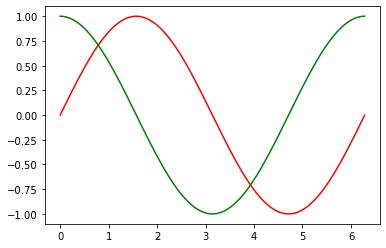

In [13]:
# matplotlib interprete les var args par position
# plt.plot(x,y,x,z)
plt.plot(x,y,'r',x,z,'g')

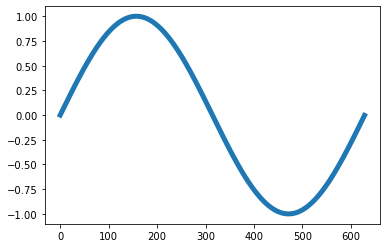

In [14]:
# 1 arg by poistion => *args, 1 by keyword => **kwargs
plt.plot(y, linewidth=5)

In [15]:
# AttributeError: 'Line2D' object has no property 'city'
# plt.plot(y, linewidth=5, city='Toulouse')

In [16]:
def f(a,b,*iterables,c=None,d=0,e=[],**kwargs):
    """Ma super fonction f
    
    Arguments:
    - a:
    - b:
    - iterables: iterables de valeurs numériques
    - c:
    ...
    """
    print("a=",a)
    print("b=",b)
    print("*iterable=",iterables)
    print("c=",c)
    print("d=",d)
    print("e=",e)
    print("**kwargs=",kwargs)
    print("**kwargs keys=", kwargs.keys())
    print("**kwargs values=", kwargs.values())
    for k,v in kwargs.items():
        print("\t-",k,"=",v)
    # traitement des options de kwargs
    if 'city' in kwargs: # recherche dans les clés
        city = kwargs['city']
        # handle city arg
        print("Handle city arg:", city)
    
    # traitement 1 *iterable => zip
    res2 = list(zip(*iterables)) # unpack => args: it1, it2, it3, ***
    
    # traitement 2 *iterable 
    # NB: if generator in iterables, already consumed by traitement 1
    res = 0
    for it in iterables:
        res += sum(it)
    return res, res2
    

In [17]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     


In [18]:
f(a=2,b=2) # ? how to process with iterable

a= 2
b= 2
*iterable= ()
c= None
d= 0
e= []
**kwargs= {}
**kwargs keys= dict_keys([])
**kwargs values= dict_values([])


(0, [])

In [19]:
# TypeError: f() got multiple values for argument 'a'
# f([],[2,3], a=2, b=3)

In [20]:
f(1,2, [],[2,3], (4,5,6), d=5, city='Toulouse', meteo='beau')

a= 1
b= 2
*iterable= ([], [2, 3], (4, 5, 6))
c= None
d= 5
e= []
**kwargs= {'city': 'Toulouse', 'meteo': 'beau'}
**kwargs keys= dict_keys(['city', 'meteo'])
**kwargs values= dict_values(['Toulouse', 'beau'])
	- city = Toulouse
	- meteo = beau
Handle city arg: Toulouse


(20, [])

In [21]:
f(1,2)

a= 1
b= 2
*iterable= ()
c= None
d= 0
e= []
**kwargs= {}
**kwargs keys= dict_keys([])
**kwargs values= dict_values([])


(0, [])

In [22]:
f(1,2, [1,22,33, 44], range(4), (x**2+1 for x in range(10)))

a= 1
b= 2
*iterable= ([1, 22, 33, 44], range(0, 4), <generator object <genexpr> at 0x00000210F2F9B0B0>)
c= None
d= 0
e= []
**kwargs= {}
**kwargs keys= dict_keys([])
**kwargs values= dict_values([])


(383, [(1, 0, 1), (22, 1, 2), (33, 2, 5), (44, 3, 10)])

In [23]:
list(zip([1,22,33], range(3), (x**2+1 for x in range(10))))

[(1, 0, 1), (22, 1, 2), (33, 2, 5)]

In [24]:
sql="""SELECT 
    title, year
FROM movies
WHERE year > 2020
    and title like 'T%'"""


In [25]:
print(sql)

SELECT 
    title, year
FROM movies
WHERE year > 2020
    and title like 'T%'


In [26]:
values = [ 12, 33, 453 ]
# math.gcd(values[0], values[1], values[2])
# math.gcd(values) => TypeError: 'list' object cannot be interpreted as an integer
math.gcd(*values) # ok with unpack

3

In [27]:
params = (1024,2)
res1 = math.log(*params)
print(res1)
x, base = params
res2 = math.log(x, base)
print(res2)

10.0
10.0


In [28]:
params = (1024, 2, 10)

# res1 = math.log(*params)
# TypeError: math.log requires 1 to 2 arguments
# print(res1)

# x, base = params
# ValueError: too many values to unpack (expected 2)
# x, base, _ = params # OK
x, base = params[:2]
res2 = math.log(x, base)
print(res2)

10.0


In [29]:
def log(x, base=math.e):
    return math.log(x, base)

In [30]:
paramsDict = {'x': 1024, 'base': 2}
# res = math.log(*params.values()) # danger, ordre des params
# res = math.log(**params) # => math.log(x=1024, base=2)
# pas de bol: TypeError: log() takes no keyword arguments
res = log(**paramsDict)
print(res)

10.0


In [32]:
def f2(*args, **kwargs):
    pass

In [33]:
# args: *values, *params,
# kwargs: **paramsDict, city='Toulouse'
f2(*values, *params, **paramsDict, city='Toulouse')

In [40]:
def f3(x) -> None:
    print(x)

In [37]:
res = f3(x)
assert res is None

1024


In [39]:
type(None)

NoneType

In [42]:
def lireFrenchCsv(filename: str) -> pd.DataFrame:
    return pd.read_csv(filename, sep=';', decimal=',')

In [43]:
def getDictValue(dictionnary, key):
    if key in dictionnary:
        return dictionnary[key]
    # else return None implicit

In [45]:
getDictValue(paramsDict, 'x')

1024

In [48]:
assert getDictValue(paramsDict, 'y') is None

In [53]:
def getDictValue(dictionnary: Dict[str,float], key: str) -> Optional[float]:
    if key in dictionnary:
        return dictionnary[key]

## Boolean

In [66]:
{ str(v) : bool(v) for v in (
    0,1, [], [1,2], 
    "", "Toulouse", 
    None,
    re.match(r'a.*', 'ah ah ah'),
    re.match(r'b.*', 'ah ah ah'))
}

{'0': False,
 '1': True,
 '[]': False,
 '[1, 2]': True,
 '': False,
 'Toulouse': True,
 'None': False,
 "<re.Match object; span=(0, 8), match='ah ah ah'>": True}

In [65]:
assert re.match(r'b.*', 'ah ah ah') is None

##  Slices

In [132]:
ville = "Toulouse"
villes = [ "Toulouse", "Pau", "Bayonne", 
          "Montpellier", "Paris", "Bordeaux", 
          "Marseille", "Lyon" ]
matrice = np.random.normal(10,4.5, (1000,1000))
dfCities = pd.read_csv('cities.csv',sep=';',decimal=',', encoding='UTF-8')


### 1. operator [] with index int

In [69]:
# operator [] => __getitem__
ville.__getitem__(0)

'T'

In [72]:
# lecture
print(ville[0])
# try ecriture
# ville[0] = 'Z'
# TypeError: 'str' object does not support item assignment
# NB: str non mutable

T


In [75]:
# inplace add on non mutable objects returns ref on a new object
text = ville
text0 = text
text += " ville rose, "
text1 = text
text += str(31000)
assert text0 is not text
assert text1 is not text
text

'Toulouse ville rose, 31000'

In [76]:
matrice.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [77]:
# true add inplace (because flag WRITEABLE : True) 
matrice += 0.1

In [79]:
print(villes[2])        # __getitem__
villes[2] = 'Biarritz'  # __setitem__
print(villes)

Bayonne
['Toulouse', 'Pau', 'Biarritz', 'Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']


In [80]:
matrice[0]  # first row

array([11.57673858, 13.27417023,  8.70509824,  7.83518359, 10.72377516,
        8.19311818, 16.21460808,  5.27720793,  6.32637131, 12.98344101,
       19.55102063, 10.58120005,  9.17505995, 10.90703468,  3.19968878,
       12.0727658 , 11.28240743,  2.50284537,  9.27608816,  2.83287409,
       13.93073444,  8.35094883, 12.11093065, 11.7290748 , 17.858718  ,
       14.17404629,  8.44646283, 11.64371773, 11.37361242,  8.4557484 ,
        6.80943537,  6.68567419, 18.96878163, 10.8959855 , 12.96536881,
       13.54280125,  6.54017205, 11.02556364, 11.76260419, 15.80843833,
        7.68988689,  7.33364036,  3.16062577,  8.57584658, 10.50232589,
        6.21124836, 14.39859807,  2.75216111,  9.77968364, 10.74584716,
       16.58680023, 13.12720667,  8.19276364,  6.42485637,  8.3745782 ,
       12.51990173,  9.71409601, 17.40424797,  3.30473887, 12.79382766,
       12.03925453, 15.56773569, 10.51475725,  2.573217  ,  2.33062603,
        4.33263745, 10.53767351, 14.01099695,  9.31184901,  9.92

In [97]:
# error if out of range
# villes[15]
# villes[-9]
# IndexError: list index out of range

In [95]:
# index positives: 0 à 7
# index negatives: -1 à -8
villes[-1]  # la derniere, len(villes)-1

'Lyon'

In [94]:
villes[-8]

'Toulouse'

### 2. operator [ ] avec slices

In [88]:
print(villes)
print(villes[:3])  # les 3 premieres, de 0 inclus à 3 exclus
print(villes[3:])  # à partir du 3e car 
print(villes[3:5]) # de la 3 (inclus) à la 5 (exclus) 
print(villes[3:300])
print(villes[200:300])  # slice vide

['Toulouse', 'Pau', 'Biarritz', 'Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
['Toulouse', 'Pau', 'Biarritz']
['Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
['Montpellier', 'Paris']
['Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
[]


In [86]:
print(ville)
print(ville[:3]) 
print(ville[3:]) 
print(ville[3:5])

Toulouse
Tou
louse
lo


In [101]:
print(villes)
print(villes[-3:]) # les 3 dernieres (pas de +1)
print(villes[-4:-2]) 

['Toulouse', 'Pau', 'Biarritz', 'Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
['Bordeaux', 'Marseille', 'Lyon']
['Paris', 'Bordeaux']


In [123]:
print(villes)
print(villes[:]) # copie de liste
print(villes[::2]) # du début à la fin avec pas de 2
print(villes[1::2]) # 1 sur 2 à partir de la numero 1 (la 2e)
print(villes[::-1]) # reverse
print(villes[-3::-1]) # de la 3e en partant de la fin vers le debut
print(villes[-5:-3:-1]) # slice vide
print(villes[-4:-6:-1]) # ok


['Toulouse', 'Pau', 'Biarritz', 'Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
['Toulouse', 'Pau', 'Biarritz', 'Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']
['Toulouse', 'Biarritz', 'Paris', 'Marseille']
['Pau', 'Montpellier', 'Bordeaux', 'Lyon']
['Lyon', 'Marseille', 'Bordeaux', 'Paris', 'Montpellier', 'Biarritz', 'Pau', 'Toulouse']
['Bordeaux', 'Paris', 'Montpellier', 'Biarritz', 'Pau', 'Toulouse']
[]
['Paris', 'Montpellier']


In [126]:
echantion10x10 = matrice[::100, ::100] # => tuple de 2 slices
print(echantion10x10.shape)
echantion10x10

(10, 10)


array([[11.57673858, 14.37387039, 13.63529148,  4.81711831,  4.45193084,
        12.85453982,  7.89127029,  6.00112161,  8.53087387, 12.93151532],
       [18.54285913, 16.31038888,  9.83247284,  7.40312214,  4.19473507,
        12.50304456, 10.91444289, 11.17677333, 10.83835287,  5.47001037],
       [ 5.59031996,  9.54871885,  9.21533951,  2.92231181, 13.50951712,
         9.40992995, 14.62837671, 13.80986892, 10.12541307,  3.55896504],
       [11.79469022, 16.81393111, 13.35405326, 12.36438773, 11.29578051,
        14.18925915, 11.79024281, 10.36280566,  8.5017492 ,  4.86714124],
       [10.09932072, 14.16590613,  2.84077872,  0.58764224,  9.32007473,
        10.50886734, 16.5068759 ,  5.49089024,  4.36745017, 13.42271506],
       [ 3.71153012,  8.77502409,  4.24026221, 14.75912088,  5.21277053,
        10.6577506 ,  9.26432196, 13.40148334,  5.15372431, 10.86700181],
       [16.45116285,  0.1545635 , 11.84630784, 10.4419798 , 10.84052222,
        17.13461478, 11.23016329, 10.09166809

In [127]:
shape = 10, 10, 5
shape

(10, 10, 5)

In [135]:
dfCities.drop(index=3, inplace=True)
dfCities

,name,cp,pop,avg_temp
0,Toulouse,31000,477000.0,"20,3"
1,Pau,64000,77000.0,"18,2"
2,Bayonne,64100,NaN,15.7
4,Paris,75000,4000000.0,"24,6"


In [136]:
dfCities.loc[0,'cp']

31000

In [137]:
dfCities.loc[1:4] # valeurs => 2 bornes incluses

,name,cp,pop,avg_temp
1,Pau,64000,77000.0,"18,2"
2,Bayonne,64100,NaN,15.7
4,Paris,75000,4000000.0,"24,6"


In [139]:
dfCities.iloc[:2] # indices => bornes debut incluse, borne fin excluse

,name,cp,pop,avg_temp
0,Toulouse,31000,477000.0,"20,3"
1,Pau,64000,77000.0,"18,2"


In [140]:
dfCities.iloc[:2, :2]

,name,cp
0,Toulouse,31000
1,Pau,64000


In [141]:
dfMeteo = pd.read_csv('https://data.toulouse-metropole.fr/explore/dataset/04-station-meteo-toulouse-ile-empalot/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B',
                   sep=';')
dfMeteo.head(3)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,084129a00000000000000000,4,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2021-02-01T20:00:00+01:00,2021-02-01T19:00:00+00:00
1,08412a400000000000000000,4,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2021-02-01T21:15:00+01:00,2021-02-01T20:15:00+00:00
2,08412aa00000000000000000,4,0,0,0.0,90000,0,ISS,0.0,0.0,0,0,-50.0,2021-02-01T22:00:00+01:00,2021-02-01T21:00:00+00:00


In [152]:
dfMeteo.heure_utc = dfMeteo.heure_utc.apply(datetime.fromisoformat)

In [150]:
#datetime.fromisoformat('2021-02-01T19:00:00+00:00')

datetime.datetime(2021, 2, 1, 19, 0, tzinfo=datetime.timezone.utc)

In [153]:
dfExtrait = dfMeteo[['heure_utc', 'humidite','pression', 'temperature']]
dfExtrait.head(2)

,heure_utc,humidite,pression,temperature
0,2021-02-01 19:00:00+00:00,0,90000,-50.0
1,2021-02-01 20:15:00+00:00,0,90000,-50.0


In [157]:
stats = dfExtrait.groupby(by=pd.Grouper(key='heure_utc',freq='1M')
        ).agg({
            'humidite' : ['min', 'max'],
            'pression' : 'mean',
            'temperature': ['mean', 'min', 'max']
        })
stats.head(5)

humidite           pression temperature            
                               min max           mean        mean   min   max
heure_utc                                                                    
2019-07-31 00:00:00+00:00        0  95   99532.110609   22.785327 -50.0  37.7
2019-08-31 00:00:00+00:00       30  95   99932.862903   23.148253  13.0  35.9
2019-09-30 00:00:00+00:00       28  97  100156.284722   19.848021   9.0  32.1
2019-10-31 00:00:00+00:00        0  97   99843.297587   16.069269 -50.0  27.9
2019-11-30 00:00:00+00:00       56  98   99033.426087    9.065252  -1.9  18.2

In [158]:
stats.columns

MultiIndex([(   'humidite',  'min'),
            (   'humidite',  'max'),
            (   'pression', 'mean'),
            ('temperature', 'mean'),
            ('temperature',  'min'),
            ('temperature',  'max')],
           )

In [160]:
stats.loc['2020-01':'2020-12', 'humidite':'pression']

humidite           pression
                               min max           mean
heure_utc                                            
2020-01-31 00:00:00+00:00       44  97  100768.941176
2020-02-29 00:00:00+00:00       31  97  100664.267722
2020-03-31 00:00:00+00:00       33  97   99941.176471
2020-04-30 00:00:00+00:00       21  97   99712.339242
2020-05-31 00:00:00+00:00       32  96   99905.880376
2020-06-30 00:00:00+00:00       35  96   99737.743056
2020-07-31 00:00:00+00:00       25  94  100022.580645
2020-08-31 00:00:00+00:00       17  96   99733.613445
2020-09-30 00:00:00+00:00        0  96   99843.368056
2020-10-31 00:00:00+00:00        0  97   99651.778523
2020-11-30 00:00:00+00:00        0  97  100312.543403
2020-12-31 00:00:00+00:00        0  98   99290.793011

In [166]:
stats.loc['2020-01':'2020-12', (slice(None,None), ['min','max'])]

,humidite,temperature,humidite,temperature
,min,min,max,max
heure_utc,,,,
2020-01-31 00:00:00+00:00,44,-2.9,97,17.5
2020-02-29 00:00:00+00:00,31,0.6,97,21.9
2020-03-31 00:00:00+00:00,33,2.2,97,21.5
2020-04-30 00:00:00+00:00,21,2.0,97,24.6
2020-05-31 00:00:00+00:00,32,9.8,96,30.3
2020-06-30 00:00:00+00:00,35,11.3,96,33.5
2020-07-31 00:00:00+00:00,25,13.1,94,37.3
2020-08-31 00:00:00+00:00,17,12.4,96,37.3


In [169]:
villes[slice(3,None)] # i.e 3:

['Montpellier', 'Paris', 'Bordeaux', 'Marseille', 'Lyon']

## partage de reference

In [110]:
listeEntiers = [ 11, 22, 33 ]
listeEntiersBis = listeEntiers[:]

In [111]:
assert listeEntiersBis[1] is listeEntiers[1]
listeEntiersBis[1] = 222
assert listeEntiersBis[1] is not listeEntiers[1]
print(listeEntiers)
print(listeEntiersBis)
listeEntiersBis[0] += 100
print(listeEntiers)
print(listeEntiersBis)

[11, 22, 33]
[11, 222, 33]
[11, 22, 33]
[111, 222, 33]


In [118]:
carre = [[8,1,6],
[3,5,7], 
[4,9,2]]
carreBis = carre[:]  # attention, copie one level => i.e carre.copy (shallow copy)
carreTer = [ row[:] for row in carre ]

In [119]:
print("old value (0,0):", carre[0][0])
carreBis[0][0] = 888  # modif sur carre & carreBis not carreTer
print(carre)
print(carreBis)
print(carreTer)

old value (0,0): 8
[[888, 1, 6], [3, 5, 7], [4, 9, 2]]
[[888, 1, 6], [3, 5, 7], [4, 9, 2]]
[[8, 1, 6], [3, 5, 7], [4, 9, 2]]
